# Linear Regression using Scikit-Learn


In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the data 
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Total number of elements in the dataset
df.shape

(25, 2)

##  Preliminary inspection of data using scatter plot
Here, we plot the data of Hours studied against percentage scored to find any relation by inspection

Text(0.5, 1.0, 'Hours studied vs Percentage')

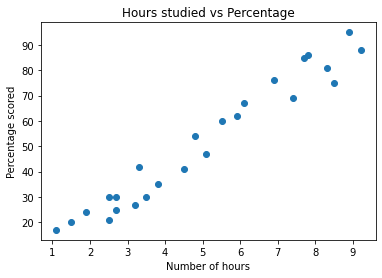

In [5]:
plt.scatter(X,y)
plt.xlabel('Number of hours')
plt.ylabel('Percentage scored')
plt.title('Hours studied vs Percentage')

### Preparing the data
In this step the data is divided into input 'features' and output 'target variable'

In [4]:
X = df[['Hours']]
y = df[['Scores']]

## Splitting the data into training and test set
In this step the given data is split into training and testing data using scikit-learn 

In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

## Training the model
A linear regression model is created and trained using the training data

In [69]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)
print('Regression model is trained')

Regression model is trained


## Plotting the regression line
Using the trained model, we find the regression line using attributes coef_ and intercept_
Then plot it over the data

Text(0.5, 1.0, 'Hours studied vs Percentage')

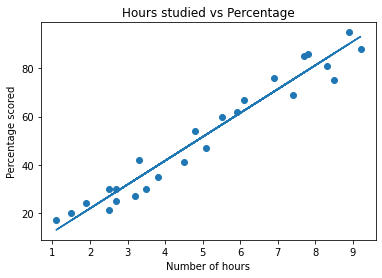

In [70]:
slope = regressor.coef_
y_intercept = regressor.intercept_

line = slope*X + y_intercept

plt.scatter(X,y)
plt.plot(X , line)
plt.xlabel('Number of hours')
plt.ylabel('Percentage scored')
plt.title('Hours studied vs Percentage')

## Making Predictions on the trained model
We predict the percentage for the elements in X_test set and compare with the original values in y_test

In [71]:
y_pred = regressor.predict(X_test)
test_values = np.array(y_test['Scores'])
y_pred = y_pred.reshape(5,)
test_df = pd.DataFrame({'Actual Values': test_values , 'Predicted Values': y_pred})
test_df

,Actual Values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Predicting the Percentage at 9.25 Hours

In [72]:
hours = 9.25
predicted_value = regressor.predict([[pred]])
print('Number of hours = {}'.format(hours))
print('Predicted Percentage = {}'.format(predicted_value))

Number of hours = 9.25
Predicted Percentage = [[93.69173249]]


## Evaluating the performance of model
Using mean absolute error we find the performance of the model

In [73]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
